<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Parsa Yousefpoor

**Student ID**: 400104686



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [1]:
## Import necessary libraries here ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [2]:
## Write your code here ##
boston = pd.read_csv('Boston.csv')
data = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
target = boston['MEDV']

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all the coefficients.

In [3]:
## Write your code here ##
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
coefficients = model.coef_

print(rmse_train)
print(rmse_test)
print(coefficients)

4.6520331848801675
4.9286021826653394
[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10 **np.linspace (3,-3,100) *0.5$$

In [4]:
## Write your code here ##
alphas = 10 **np.linspace (3,-3,100) *0.5

# Initialize lists to store results
mse_train = []
mse_test = []
num_not_considered_features = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_train_pred_ridge = ridge_model.predict(X_train)
    y_test_pred_ridge = ridge_model.predict(X_test)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred_ridge))
    mse_test.append(mean_squared_error(y_test, y_test_pred_ridge))
    num_not_considered_features.append(np.sum(ridge_model.coef_ == 0))

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

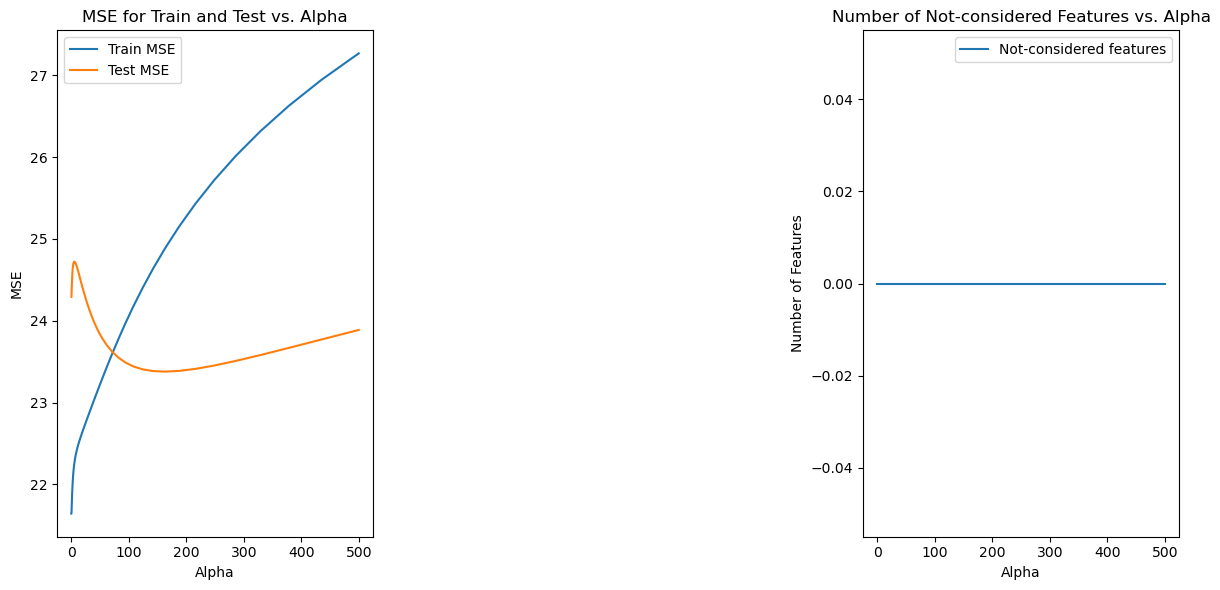

In [5]:
## Write your code here ##
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(alphas, mse_train, label="Train MSE")
plt.plot(alphas, mse_test, label="Test MSE")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("MSE for Train and Test vs. Alpha")
plt.legend()

'''plt.subplot(132)
plt.plot(alphas, ridge_model.coef_, label="Coefficients")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")
plt.title("Coefficients vs. Alpha")
plt.legend()'''

plt.subplot(133)
plt.plot(alphas, num_not_considered_features, label="Not-considered features")
plt.xlabel("Alpha")
plt.ylabel("Number of Features")
plt.title("Number of Not-considered Features vs. Alpha")
plt.legend()

plt.tight_layout()
plt.show()

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

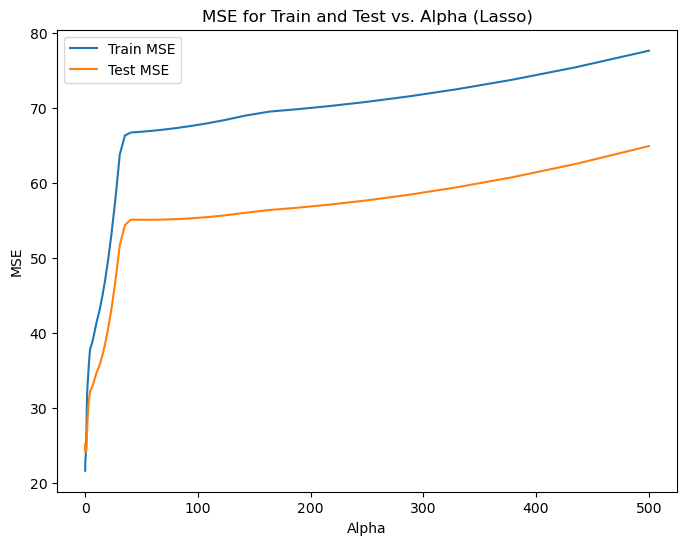

In [6]:
## Write your code here ##
# Initialize lists to store results
mse_train_lasso = []
mse_test_lasso = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_train_pred_lasso = lasso_model.predict(X_train)
    y_test_pred_lasso = lasso_model.predict(X_test)
    
    mse_train_lasso.append(mean_squared_error(y_train, y_train_pred_lasso))
    mse_test_lasso.append(mean_squared_error(y_test, y_test_pred_lasso))

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(alphas, mse_train_lasso, label="Train MSE")
plt.plot(alphas, mse_test_lasso, label="Test MSE")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("MSE for Train and Test vs. Alpha (Lasso)")
plt.legend()
plt.show()

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

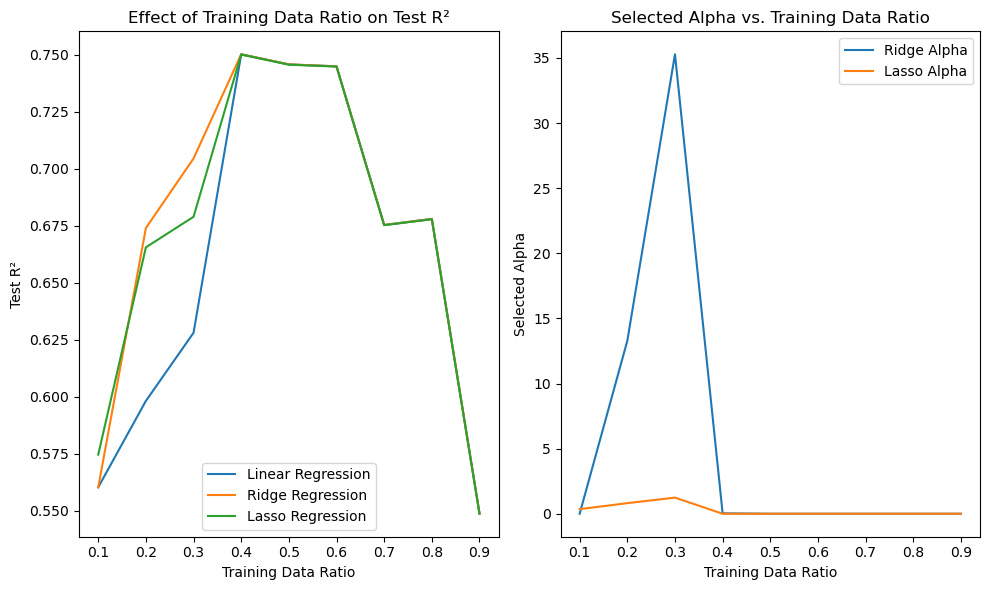

In [7]:
## Write you code here ##
# Vary the training data ratio (from low to high)
ratios = np.linspace(0.1, 0.9, 9)  # Adjust as needed

# Initialize lists to store results
r2_linear = []
r2_ridge = []
r2_lasso = []
selected_alpha_ridge = []
selected_alpha_lasso = []
X = X_train
y = y_train

for ratio in ratios:
    # Split data based on the ratio
    num_train_samples = int(ratio * len(X))
    X_train_ratio, y_train_ratio = X[:num_train_samples], y[:num_train_samples]
    X_test_ratio, y_test_ratio = X[num_train_samples:], y[num_train_samples:]
    
    # Linear regression
    model_linear = LinearRegression()
    model_linear.fit(X_train_ratio, y_train_ratio)
    y_test_pred_linear = model_linear.predict(X_test_ratio)
    r2_linear.append(r2_score(y_test_ratio, y_test_pred_linear))
    
    # Ridge regression
    alphas_ridge = 10 **np.linspace (3,-3,100) *0.5
    best_ridge_r2 = -np.inf
    best_ridge_alpha = None
    for alpha in alphas_ridge:
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train_ratio, y_train_ratio)
        y_test_pred_ridge = ridge_model.predict(X_test_ratio)
        r2 = r2_score(y_test_ratio, y_test_pred_ridge)
        if r2 > best_ridge_r2:
            best_ridge_r2 = r2
            best_ridge_alpha = alpha
    r2_ridge.append(best_ridge_r2)
    selected_alpha_ridge.append(best_ridge_alpha)
    
    # Lasso regression
    alphas_lasso = 10 **np.linspace (3,-3,100) *0.5
    best_lasso_r2 = -np.inf
    best_lasso_alpha = None
    for alpha in alphas_lasso:
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train_ratio, y_train_ratio)
        y_test_pred_lasso = lasso_model.predict(X_test_ratio)
        r2 = r2_score(y_test_ratio, y_test_pred_lasso)
        if r2 > best_lasso_r2:
            best_lasso_r2 = r2
            best_lasso_alpha = alpha
    r2_lasso.append(best_lasso_r2)
    selected_alpha_lasso.append(best_lasso_alpha)

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(ratios, r2_linear, label="Linear Regression")
plt.plot(ratios, r2_ridge, label="Ridge Regression")
plt.plot(ratios, r2_lasso, label="Lasso Regression")
plt.xlabel("Training Data Ratio")
plt.ylabel("Test R²")
plt.title("Effect of Training Data Ratio on Test R²")
plt.legend()

plt.subplot(122)
plt.plot(ratios, selected_alpha_ridge, label="Ridge Alpha")
plt.plot(ratios, selected_alpha_lasso, label="Lasso Alpha")
plt.xlabel("Training Data Ratio")
plt.ylabel("Selected Alpha")
plt.title("Selected Alpha vs. Training Data Ratio")
plt.legend()

plt.tight_layout()
plt.show()
